# Risk Assessment & Credit Analysis Q3

How does employment length correlate with default rates across different job types?

| employment_length | employment_type | total_loans | default_rate |
|-------------------|-----------------|-------------|--------------|
| Long              | Full-time       | 1246        | 0.14         |
| Long              | Self-employed   | 302         | 0.146        |
| Very Long         | Unemployed      | 6           | 0.167        |
| Long              | Part-time       | 401         | 0.17         |
| Long              | Unemployed      | 87          | 0.172        |
| Medium            | Part-time       | 2438        | 0.173        |
| Medium            | Full-time       | 7356        | 0.182        |
| Medium            | Self-employed   | 1857        | 0.183        |
| Medium            | Unemployed      | 647         | 0.215        |
| Very Long         | Full-time       | 83          | 0.217        |
| Short             | Unemployed      | 895         | 0.24         |
| Very Long         | Part-time       | 29          | 0.241        |
| Short             | Full-time       | 10248       | 0.243        |
| Short             | Part-time       | 3460        | 0.252        |
| Short             | Self-employed   | 2596        | 0.256        |
| Very Long         | Self-employed   | 33          | 0.333        |

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
filename = '../Data/employment-length-analysis.csv'
df = pd.read_csv(filename)

In [3]:
df['default_rate'] = df['default_rate'].apply(lambda x: x * 100)

In [4]:
df

,employment_length,employment_type,count,default_rate
0,Long,Full-time,1246,14.0
1,Long,Self-employed,302,14.6
2,Very Long,Unemployed,6,16.7
3,Long,Part-time,401,17.0
4,Long,Unemployed,87,17.2
5,Medium,Part-time,2438,17.3
6,Medium,Full-time,7356,18.2
7,Medium,Self-employed,1857,18.3
8,Medium,Unemployed,647,21.5
9,Very Long,Full-time,83,21.7


In [5]:
# Try one-way ANOVA instead of two-way
from scipy import stats
groups = [group['default_rate'].values for name, group in df.groupby('employment_length')]
f_stat, p_value = stats.f_oneway(*groups)

In [6]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")
    print(f"F-statistic: {f_stat}, p-value: {p_value}")

Reject the null hypothesis: There is a significant difference between the groups.
F-statistic: 5.396526114765525, p-value: 0.013895804976080695


In [7]:
# Post-hoc test (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['default_rate'], groups=df['employment_length'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  Long    Medium    3.125  0.643 -4.6582 10.9082  False
  Long     Short    9.075 0.0212  1.2918 16.8582   True
  Long Very Long     8.25 0.0367  0.4668 16.0332   True
Medium     Short     5.95   0.16 -1.8332 13.7332  False
Medium Very Long    5.125 0.2575 -2.6582 12.9082  False
 Short Very Long   -0.825 0.9887 -8.6082  6.9582  False
-------------------------------------------------------


## **What This Test Shows:**
This compares **all pairs** of employment length groups to see which ones have significantly different default rates.

## **Results Breakdown:**

| Comparison | Mean Difference | P-value | Significant? | Interpretation |
|------------|----------------|---------|--------------|----------------|
| **Long vs Medium** | 3.125% | 0.643 | **No** | No significant difference |
| **Long vs Short** | 9.075% | 0.021 | **Yes** ✅ | Short employment has significantly higher default rates |
| **Long vs Very Long** | 8.25% | 0.037 | **Yes** ✅ | Very Long has significantly higher default rates |
| **Medium vs Short** | 5.95% | 0.160 | **No** | No significant difference |
| **Medium vs Very Long** | 5.125% | 0.258 | **No** | No significant difference |
| **Short vs Very Long** | -0.825% | 0.989 | **No** | No significant difference |

## **Key Business Insights:**

### **🎯 Main Finding:**
**Long employment tenure** has significantly **lower default rates** than both:
- Short employment (9.075% lower default rate)
- Very Long employment (8.25% lower default rate)

### **🤔 Surprising Result:**
"Very Long" employment actually performs **worse** than "Long" employment - this could be due to:
- Very small sample sizes in "Very Long" category
- Different risk profiles (maybe older workers closer to retirement?)
- Industry/economic factors

### **📊 Practical Application:**
- **Safest lending:** Long-term employees (5-20 years experience)
- **Higher risk:** New employees (<5 years) and very senior employees (20+ years)
- Medium-term employees fall in between but aren't significantly different from others

In [8]:
groups = [group['default_rate'].values for name, group in df.groupby('employment_type')]
f_stat, p_value = stats.f_oneway(*groups)

In [9]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")
    print(f"F-statistic: {f_stat}, p-value: {p_value}")

Fail to reject the null hypothesis: No significant difference between the groups.
F-statistic: 0.31621599042022913, p-value: 0.8134563601090531


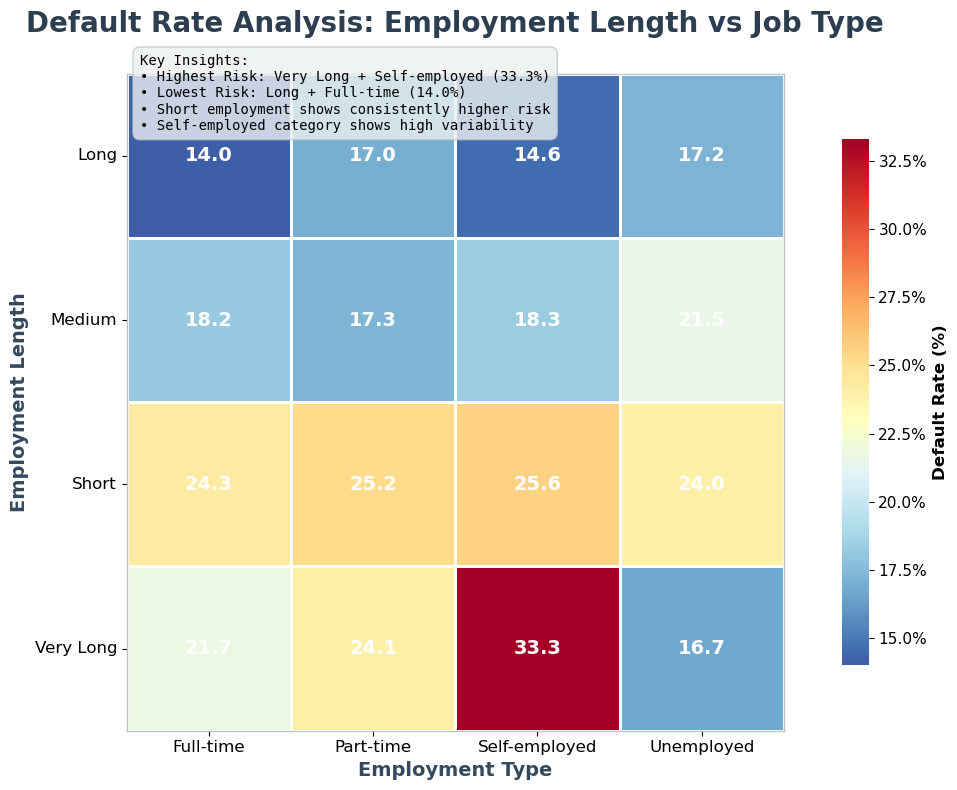


Summary Statistics:
Overall Mean Default Rate: 20.8%
Highest Default Rate: 33.3% (('Very Long', 'Self-employed'))
Lowest Default Rate: 14.0% (('Long', 'Full-time'))
Standard Deviation: 4.9%


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the DataFrame for heatmap (numeric matrix)
heatmap_data = df.pivot(index='employment_length', columns='employment_type', values='default_rate')

# Set up the figure with professional styling
plt.style.use('default')  # Clean base style
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap with professional color scheme
heatmap = sns.heatmap(heatmap_data, 
                      annot=True, 
                      fmt='.1f', 
                      cmap='RdYlBu_r',  # Professional color scheme (red-yellow-blue reversed)
                      center=23,  # Center the colormap around middle values
                      square=True,
                      linewidths=1,
                      linecolor='white',
                      cbar_kws={
                          'label': 'Default Rate (%)',
                          'shrink': 0.8,
                          'format': '%.1f%%'
                      },
                      annot_kws={
                          'size': 14, 
                          'weight': 'bold',
                          'color': 'white'
                      })

# Customize the plot for business presentation
ax.set_title('Default Rate Analysis: Employment Length vs Job Type', 
             fontsize=20, fontweight='bold', pad=30, color='#2c3e50')

ax.set_xlabel('Employment Type', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylabel('Employment Length', fontsize=14, fontweight='bold', color='#34495e')

# Rotate and style the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=12)

# Style the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.ax.yaxis.label.set_size(12)
cbar.ax.yaxis.label.set_weight('bold')

# Add subtle grid
ax.grid(False)  # Remove default grid
ax.set_facecolor('#f8f9fa')  # Light background

# Add a professional border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('#bdc3c7')

# Adjust layout for better presentation
plt.tight_layout()

# Add annotation with key insights
textstr = '''Key Insights:
• Highest Risk: Very Long + Self-employed (33.3%)
• Lowest Risk: Long + Full-time (14.0%)
• Short employment shows consistently higher risk
• Self-employed category shows high variability'''

# Add text box with insights
props = dict(boxstyle='round,pad=0.5', facecolor='#ecf0f1', alpha=0.8, edgecolor='#bdc3c7')
ax.text(0.02, 1.03, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Optional: Save as high-quality image for presentations
# plt.savefig('default_rate_heatmap.png', dpi=300, bbox_inches='tight', 
#             facecolor='white', edgecolor='none')

plt.show()

# Optional: Print summary statistics
print("\nSummary Statistics:")
print(f"Overall Mean Default Rate: {heatmap_data.values.mean():.1f}%")
print(f"Highest Default Rate: {heatmap_data.values.max():.1f}% ({heatmap_data.stack().idxmax()})")
print(f"Lowest Default Rate: {heatmap_data.values.min():.1f}% ({heatmap_data.stack().idxmin()})")
print(f"Standard Deviation: {heatmap_data.values.std():.1f}%")

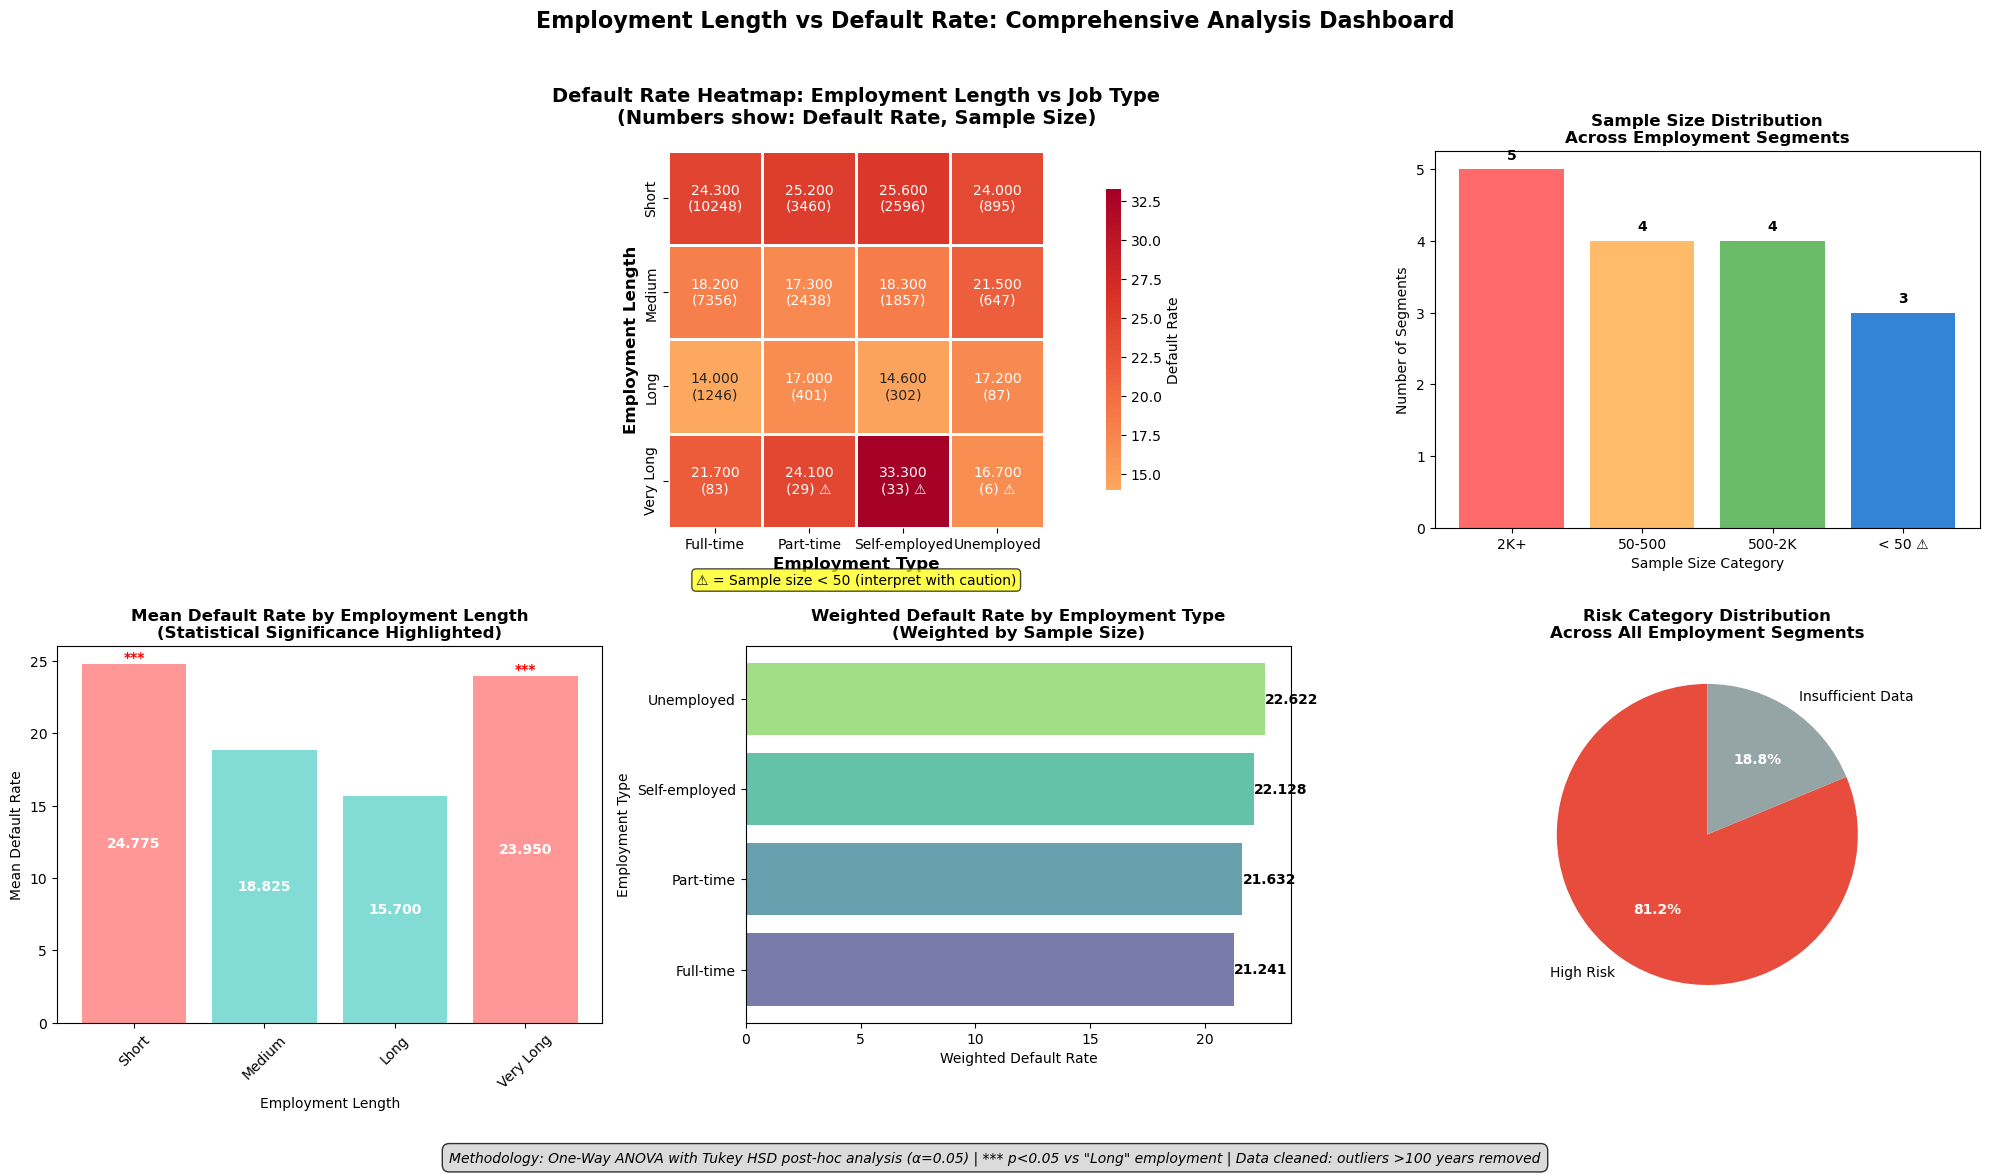

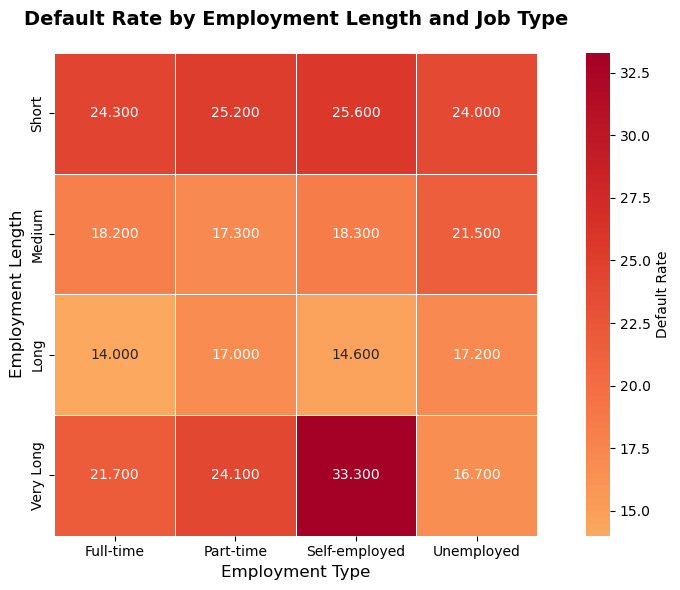

Visualizations saved:
1. employment_analysis_dashboard.png - Comprehensive dashboard
2. employment_heatmap_simple.png - Clean heatmap for presentations


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('default')
sns.set_palette("husl")



# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 12))

# Define custom order for better visualization
employment_length_order = ['Short', 'Medium', 'Long', 'Very Long']
employment_type_order = ['Full-time', 'Part-time', 'Self-employed', 'Unemployed']

#=============================================================================
# PLOT 1: Main Heatmap with Default Rates and Sample Sizes
#=============================================================================
ax1 = plt.subplot(2, 3, (1, 2))

# Pivot data for heatmap
heatmap_data = df.pivot(index='employment_length', 
                        columns='employment_type', 
                        values='default_rate')
sample_data = df.pivot(index='employment_length', 
                       columns='employment_type', 
                       values='count')

# Reorder according to our custom order
heatmap_data = heatmap_data.reindex(employment_length_order)
heatmap_data = heatmap_data.reindex(columns=employment_type_order)
sample_data = sample_data.reindex(employment_length_order)
sample_data = sample_data.reindex(columns=employment_type_order)

# Create custom annotations with both rate and sample size
annotations = []
for i in range(len(heatmap_data.index)):
    row = []
    for j in range(len(heatmap_data.columns)):
        rate = heatmap_data.iloc[i, j]
        size = sample_data.iloc[i, j]
        if pd.notna(rate) and pd.notna(size):
            # Color code sample size warnings
            if size < 50:
                annotation = f'{rate:.3f}\n({int(size)}) ⚠️'
            else:
                annotation = f'{rate:.3f}\n({int(size)})'
        else:
            annotation = 'N/A'
        row.append(annotation)
    annotations.append(row)

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=annotations,
            fmt='',
            cmap='RdYlGn_r',  # Red = high risk, Green = low risk
            center=0.20,      # Center around 20% default rate
            cbar_kws={'label': 'Default Rate', 'shrink': 0.8},
            linewidths=1,
            linecolor='white',
            square=True,
            ax=ax1)

ax1.set_title('Default Rate Heatmap: Employment Length vs Job Type\n(Numbers show: Default Rate, Sample Size)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Employment Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Employment Length', fontsize=12, fontweight='bold')

# Add warning text for small samples
ax1.text(0.5, -0.15, '⚠️ = Sample size < 50 (interpret with caution)', 
         transform=ax1.transAxes, ha='center', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

#=============================================================================
# PLOT 2: Sample Size Warnings
#=============================================================================
ax2 = plt.subplot(2, 3, 3)

# Create sample size categories
df_viz = df.copy()
df_viz['sample_category'] = pd.cut(df_viz['count'], 
                                   bins=[0, 50, 500, 2000, float('inf')], 
                                   labels=['< 50 ⚠️', '50-500', '500-2K', '2K+'])

sample_counts = df_viz['sample_category'].value_counts()
colors = ['#ff4444', '#ffaa44', '#44aa44', '#0066cc']

bars = ax2.bar(sample_counts.index, sample_counts.values, color=colors, alpha=0.8)
ax2.set_title('Sample Size Distribution\nAcross Employment Segments', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Segments', fontsize=10)
ax2.set_xlabel('Sample Size Category', fontsize=10)

# Add value labels on bars
for bar, value in zip(bars, sample_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(value), ha='center', va='bottom', fontweight='bold')

#=============================================================================
# PLOT 3: Default Rate by Employment Length (Statistical Significance)
#=============================================================================
ax3 = plt.subplot(2, 3, 4)

# Calculate mean default rate by employment length
length_stats = df.groupby('employment_length').agg({
    'default_rate': 'mean',
    'count': 'sum'
}).reset_index()

# Reorder for better visualization
length_stats['employment_length'] = pd.Categorical(
    length_stats['employment_length'], 
    categories=employment_length_order, 
    ordered=True
)
length_stats = length_stats.sort_values('employment_length')

# Create bar plot with statistical significance indicators
bars = ax3.bar(length_stats['employment_length'], 
               length_stats['default_rate'], 
               alpha=0.7,
               color=['#ff6b6b' if x in ['Short', 'Very Long'] else '#4ecdc4' 
                      for x in length_stats['employment_length']])

ax3.set_title('Mean Default Rate by Employment Length\n(Statistical Significance Highlighted)', 
              fontsize=12, fontweight='bold')
ax3.set_ylabel('Mean Default Rate', fontsize=10)
ax3.set_xlabel('Employment Length', fontsize=10)
ax3.tick_params(axis='x', rotation=45)

# Add significance annotations
significant_pairs = [('Long', 'Short'), ('Long', 'Very Long')]
for bar, length in zip(bars, length_stats['employment_length']):
    height = bar.get_height()
    # Mark significantly different groups
    if length in ['Short', 'Very Long']:
        ax3.text(bar.get_x() + bar.get_width()/2, height + 0.005, 
                 '***', ha='center', va='bottom', fontweight='bold', color='red')
    ax3.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'{height:.3f}', ha='center', va='center', 
             fontweight='bold', color='white')

#=============================================================================
# PLOT 4: Employment Type Performance
#=============================================================================
ax4 = plt.subplot(2, 3, 5)

# Calculate weighted average by employment type (weighted by sample size)
type_stats = df.groupby('employment_type').apply(
    lambda x: np.average(x['default_rate'], weights=x['count'])
).reset_index()
type_stats.columns = ['employment_type', 'weighted_default_rate']

# Add total sample size
type_totals = df.groupby('employment_type')['count'].sum().reset_index()
type_stats = type_stats.merge(type_totals, on='employment_type')

# Sort by default rate
type_stats = type_stats.sort_values('weighted_default_rate')

bars = ax4.barh(type_stats['employment_type'], 
                type_stats['weighted_default_rate'],
                alpha=0.7,
                color=sns.color_palette("viridis", len(type_stats)))

ax4.set_title('Weighted Default Rate by Employment Type\n(Weighted by Sample Size)', 
              fontsize=12, fontweight='bold')
ax4.set_xlabel('Weighted Default Rate', fontsize=10)
ax4.set_ylabel('Employment Type', fontsize=10)

# Add value labels
for bar, value in zip(bars, type_stats['weighted_default_rate']):
    ax4.text(value + 0.003, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', fontweight='bold')

#=============================================================================
# PLOT 5: Risk Matrix Summary
#=============================================================================
ax5 = plt.subplot(2, 3, 6)

# Create risk categories
def risk_category(rate, size):
    if size < 50:
        return 'Insufficient Data'
    elif rate < 0.18:
        return 'Low Risk'
    elif rate < 0.22:
        return 'Medium Risk'
    else:
        return 'High Risk'

df_risk = df.copy()
df_risk['risk_category'] = df_risk.apply(
    lambda x: risk_category(x['default_rate'], x['count']), axis=1
)

risk_counts = df_risk['risk_category'].value_counts()
risk_colors = {'Low Risk': '#2ecc71', 'Medium Risk': '#f39c12', 
               'High Risk': '#e74c3c', 'Insufficient Data': '#95a5a6'}

wedges, texts, autotexts = ax5.pie(risk_counts.values, 
                                   labels=risk_counts.index,
                                   colors=[risk_colors[cat] for cat in risk_counts.index],
                                   autopct='%1.1f%%',
                                   startangle=90)

ax5.set_title('Risk Category Distribution\nAcross All Employment Segments', 
              fontsize=12, fontweight='bold')

# Enhance text readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#=============================================================================
# Final Layout and Styling
#=============================================================================
plt.suptitle('Employment Length vs Default Rate: Comprehensive Analysis Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)

# Add methodology note
fig.text(0.5, 0.02, 
         'Methodology: One-Way ANOVA with Tukey HSD post-hoc analysis (α=0.05) | *** p<0.05 vs "Long" employment | Data cleaned: outliers >100 years removed',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 0.96])

# Save high-quality version
plt.savefig('employment_analysis_dashboard.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()